In [1]:
pip install statsmodels

You should consider upgrading via the 'c:\users\soham\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('Fish.csv')      #Read the data file

In [4]:
#rename the columns
data.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
data.head()   # show the data header
print(data.sample(10))    # visualize a sample set of 10 from this dataset
print(data.info())    # print the information about the dataset

       Species  Weight  LengthVer  LengthDia  LengthCro   Height   Width
81       Perch    85.0       18.2       20.0       21.0   5.0820  2.7720
8        Bream   450.0       27.6       30.0       35.1  14.0049  4.8438
147      Smelt     7.0       10.1       10.6       11.6   1.7284  1.1484
71      Parkki   300.0       24.0       26.0       29.0  11.3680  4.2340
144       Pike  1650.0       59.0       63.4       68.0  10.8120  7.4800
119      Perch   850.0       36.9       40.0       42.3  11.9286  7.1064
114      Perch   700.0       34.5       37.0       39.4  10.8350  6.2646
129       Pike   300.0       31.7       34.0       37.8   5.7078  4.1580
56   Whitefish   270.0       24.1       26.5       29.3   8.1454  4.2485
143       Pike  1550.0       56.0       60.0       64.0   9.6000  6.1440
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species 

In [5]:
# check if there are any NANs in the dataset
print(str('Is there any NaN value in the dataset: '), data.isnull().values.any())

Is there any NaN value in the dataset:  False


In [6]:
# show the number of fish in each category of species
sp = data['Species'].value_counts()
sp = pd.DataFrame(sp)
print(sp)

           Species
Perch           56
Bream           35
Roach           20
Pike            17
Smelt           14
Parkki          11
Whitefish        6


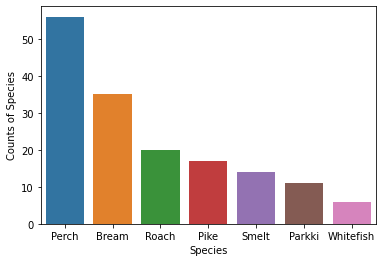

In [7]:
# visualize the data set

sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [8]:
# get data correlations
print(data.corr())        # print the correlations between the vars

             Weight  LengthVer  LengthDia  LengthCro    Height     Width
Weight     1.000000   0.915712   0.918618   0.923044  0.724345  0.886507
LengthVer  0.915712   1.000000   0.999517   0.992031  0.625378  0.867050
LengthDia  0.918618   0.999517   1.000000   0.994103  0.640441  0.873547
LengthCro  0.923044   0.992031   0.994103   1.000000  0.703409  0.878520
Height     0.724345   0.625378   0.640441   0.703409  1.000000  0.792881
Width      0.886507   0.867050   0.873547   0.878520  0.792881  1.000000


<AxesSubplot: >

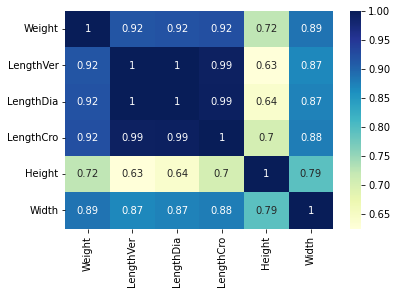

In [9]:
# get data heatmaps
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

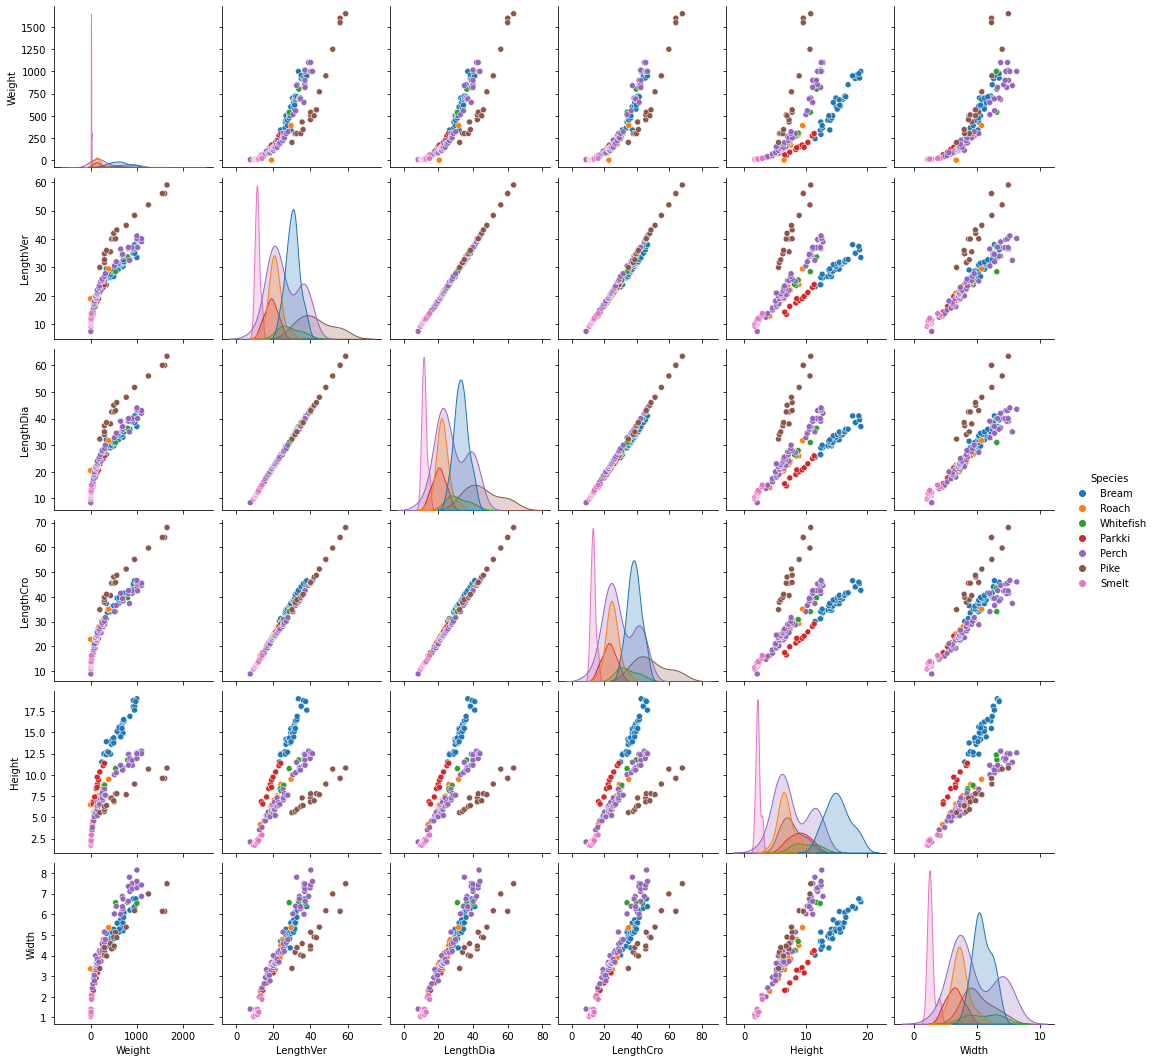

In [10]:
# pairplots
g = sns.pairplot(data, kind='scatter', hue='Species')

In [11]:
# you can identify some outliers in the dataset through different methods and drop them
data1 = data.drop([142,143,144])
data1.describe().T  # describe the dataset

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [12]:
# Dependant (Target) Variable:
y = data['Weight']   

In [13]:
# Independant Variables:
X = data.iloc[:,2:7] # the rest of the variables are now our independent variables

In [14]:
# split the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [15]:
# print some information about the training and test datasets
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (143, 5)
y_train:  (143,)
X_test:  (16, 5)
y_test:  (16,)


In [16]:
# now fit the training data on a linear regression model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [17]:
# the model training outputs the slope and intercept values. note that instead of slopes we have coefficients
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -489.13136902135994
Model coefficients:  [ 62.35407644  -7.69096513 -28.03313299  26.13064342  25.31544947]


Cross Validation Scores  [0.8562604  0.75991314 0.84475146 0.91236167 0.94082573 0.82536441
 0.93620816 0.88391266 0.84269753 0.79109824]


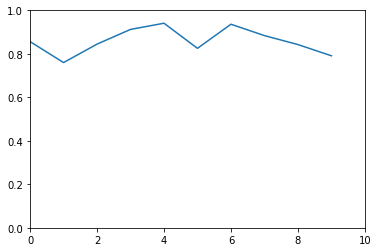

In [18]:
# Peform Cross Validation

from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print("Cross Validation Scores ",cross_val_score_train)
plt.plot(cross_val_score_train)
plt.xlim([0,10])
plt.ylim([0,1])
plt.show()

In [19]:
# Perform Prediction
y_pred = reg.predict(X_test)    # predict with test data
y_train_pred = reg.predict(X_train)   # predict with training data

In [20]:
# print the final scores
print("R2 score with training data",r2_score(y_train, y_train_pred))
print("R2 score with testing data",r2_score(y_test, y_pred))

R2 score with training data 0.8828709491568832
R2 score with testing data 0.9005556416512503


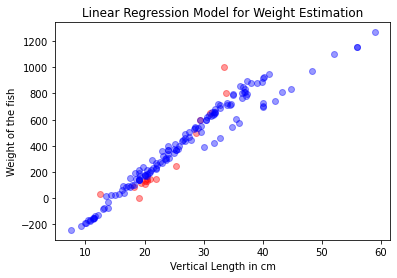

In [21]:
plt.scatter(X_test['LengthVer'], y_test, color='red', alpha=0.4)
plt.scatter(X_train['LengthVer'], y_train_pred, color='blue', alpha=0.4)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');
plt.show()

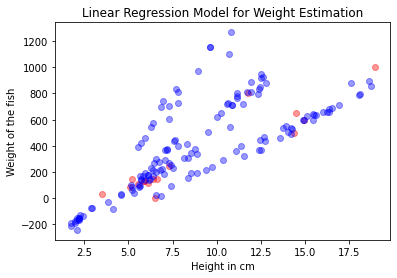

In [22]:
plt.scatter(X_test['Height'], y_test, color='red', alpha=0.4)
plt.scatter(X_train['Height'], y_train_pred, color='blue', alpha=0.4)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');
plt.show()

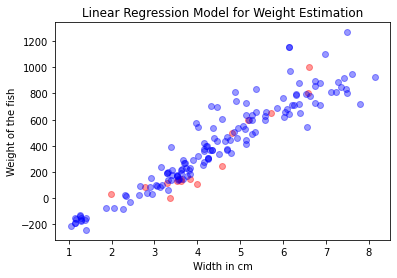

In [23]:
plt.scatter(X_test['Width'], y_test, color='red', alpha=0.4)
plt.scatter(X_train['Width'], y_train_pred, color='blue', alpha=0.4)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');
plt.show()